In [1]:
from fastai import *
from fastai.vision import *
from os import listdir
import sys
from PIL import Image
from fastai.widgets import *

In [2]:
# Sources
# Image collection procedure and code
# https://github.com/fpingham/google-images-dataset

In [6]:
def image_downloader(x):
    url_path = Path('lesson1/image_url_lists')
    path = Path('lesson1/shoe_brand_images')
    folder = x.split('.')[0]
    dest = path/folder
    dest.mkdir(parents=True, exist_ok=True)
    download_images(url_path/x, dest,max_workers=0)

In [7]:
shoe_brand_image_urls = listdir(os.getcwd()+"/lesson1/image_url_lists")
shoe_brand_image_urls = [ x for x in shoe_brand_image_urls if x is not '.DS_Store' ]

In [ ]:
# [image_downloader(item) for item in shoe_brand_image_urls]
# [image_downloader(item) for item in ['aarkcopenhagen.txt','adidas.txt','allbirds.txt','asics.txt']]
[image_downloader(item) for item in ['balenciaga.txt','brandblack.txt','burberry.txt','clae.txt']]
# [image_downloader(item) for item in ['coach.txt','commonprojects.txt','converse.txt','fendi.txt']]
# [image_downloader(item) for item in ['goldengoose.txt','louisvuitton.txt','nike.txt']]
# [image_downloader(item) for item in ['prada.txt','reebok.txt','saucony.txt','vans.txt']]
# [image_downloader(item) for item in ['veja.txt','yeezy.txt','yvessaintlaurent.txt']]

Error https://brands-hub.co/pub/media/catalog/product/cache/cf3f2243ef4940fd5c66f2ff035145ac/b/u/burberry_unisex_shoes_embroidered_logo_leather_sneakers-black_8__1.jpg HTTPSConnectionPool(host='brands-hub.co', port=443): Max retries exceeded with url: /pub/media/catalog/product/cache/cf3f2243ef4940fd5c66f2ff035145ac/b/u/burberry_unisex_shoes_embroidered_logo_leather_sneakers-black_8__1.jpg (Caused by ConnectTimeoutError(<urllib3.connection.VerifiedHTTPSConnection object at 0x7f72e1c99400>, 'Connection to brands-hub.co timed out. (connect timeout=4)'))
Error https://www.scottmcneight.com/image/cache/data/category_2/burberry-checked-cotton-sneakers-women-sneakers-new-product-discounts-p00344383-9qd-197-500x500_0.jpg HTTPSConnectionPool(host='www.scottmcneight.com', port=443): Max retries exceeded with url: /image/cache/data/category_2/burberry-checked-cotton-sneakers-women-sneakers-new-product-discounts-p00344383-9qd-197-500x500_0.jpg (Caused by ConnectTimeoutError(<urllib3.connection.Ve

In [ ]:
for x in shoe_brand_image_urls:
    dirname = 'lesson1/shoe_brand_images/' + x.split('.')[0]
    print(dirname)
    cnt=0
    for filename in os.listdir(dirname):
        try:
            img=Image.open(dirname+"/"+filename)
        except OSError:
            print("FILE: ", filename, "is corrupt!")
            cnt+=1
            os.remove(dirname+"/"+filename)
    print("Successfully Completed Operation! Files Courrupted are ", cnt)

In [ ]:
data = ImageDataBunch.from_folder(Path('lesson1/shoe_brand_images'), train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=0)

In [ ]:
data.show_batch(rows=3, figsize=(7,8),num_workers=0)

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [ ]:
learn.model

In [ ]:
learn.fit_one_cycle(4)

In [ ]:
learn.save('stage-1')

In [9]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

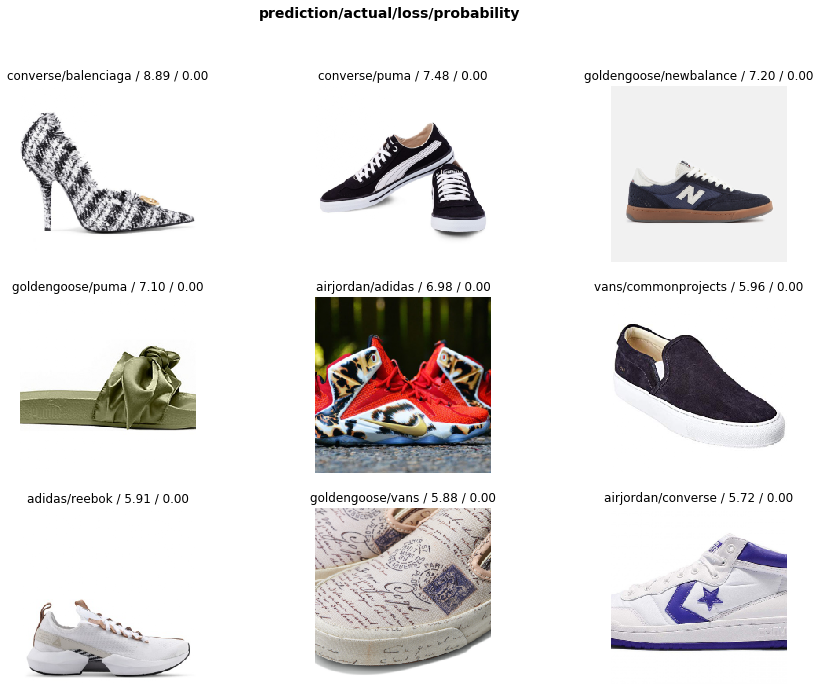

In [10]:
interp.plot_top_losses(9, figsize=(15,11))

In [11]:
doc(interp.plot_top_losses)

_cl_int_plot_top_losses [source] [test] _cl_int_plot_top_losses ( k , largest = True , figsize = (12, 12) , heatmap : bool = False , heatmap_thresh : int = 16 , return_fig : bool = None ) → Optional [ Figure ] 
 
 × No tests found for _cl_int_plot_top_losses . To contribute a test please refer to this guide and this discussion . Show images in top_losses along with their prediction, actual, loss, and probability of actual class. 
 Show in docs

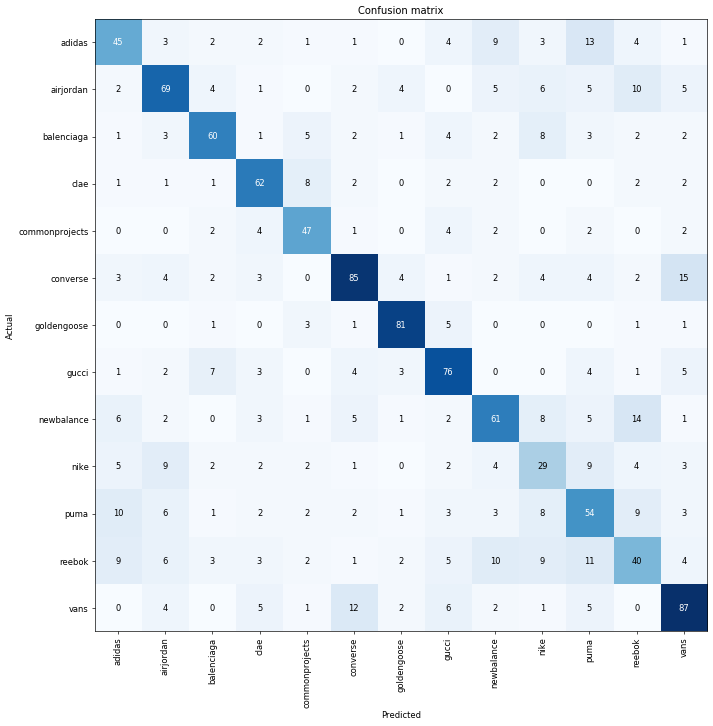

In [12]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [13]:
interp.most_confused(min_val=6)

[('converse', 'vans', 15),
 ('newbalance', 'reebok', 14),
 ('adidas', 'puma', 13),
 ('vans', 'converse', 12),
 ('reebok', 'puma', 11),
 ('airjordan', 'reebok', 10),
 ('puma', 'adidas', 10),
 ('reebok', 'newbalance', 10),
 ('adidas', 'newbalance', 9),
 ('nike', 'airjordan', 9),
 ('nike', 'puma', 9),
 ('puma', 'reebok', 9),
 ('reebok', 'adidas', 9),
 ('reebok', 'nike', 9),
 ('balenciaga', 'nike', 8),
 ('clae', 'commonprojects', 8),
 ('newbalance', 'nike', 8),
 ('puma', 'nike', 8),
 ('gucci', 'balenciaga', 7),
 ('airjordan', 'nike', 6),
 ('newbalance', 'adidas', 6),
 ('puma', 'airjordan', 6),
 ('reebok', 'airjordan', 6),
 ('vans', 'gucci', 6),
 ('airjordan', 'newbalance', 5),
 ('airjordan', 'puma', 5),
 ('airjordan', 'vans', 5),
 ('balenciaga', 'commonprojects', 5),
 ('goldengoose', 'gucci', 5),
 ('gucci', 'vans', 5),
 ('newbalance', 'converse', 5),
 ('newbalance', 'puma', 5),
 ('nike', 'adidas', 5),
 ('reebok', 'gucci', 5),
 ('vans', 'clae', 5),
 ('vans', 'puma', 5),
 ('adidas', 'gucci',

In [14]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


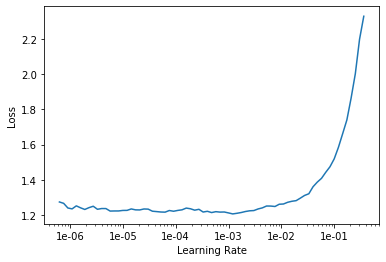

In [15]:
learn.recorder.plot()

In [16]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,1.241163,1.093964,0.354864,04:27
1,1.062071,1.011541,0.322179,04:25


In [17]:
learn.save('stage-2')

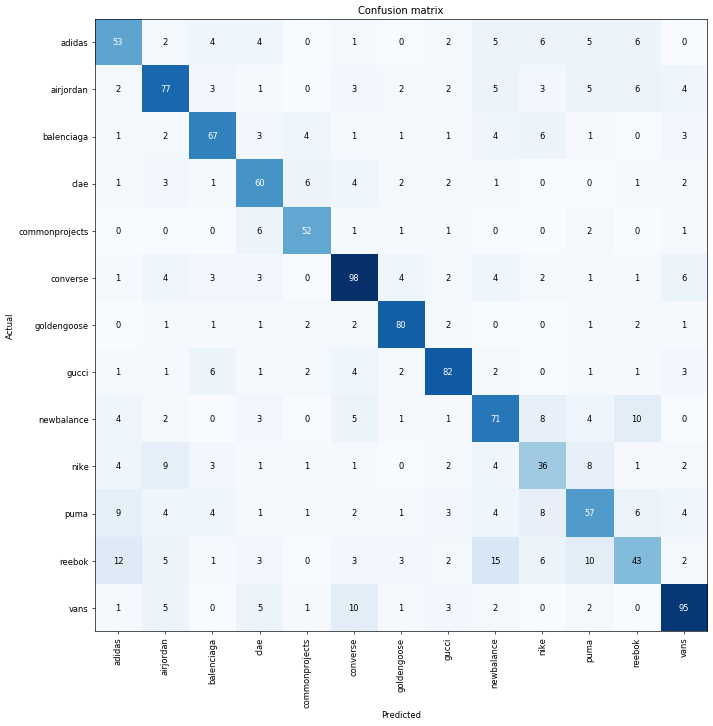

In [18]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

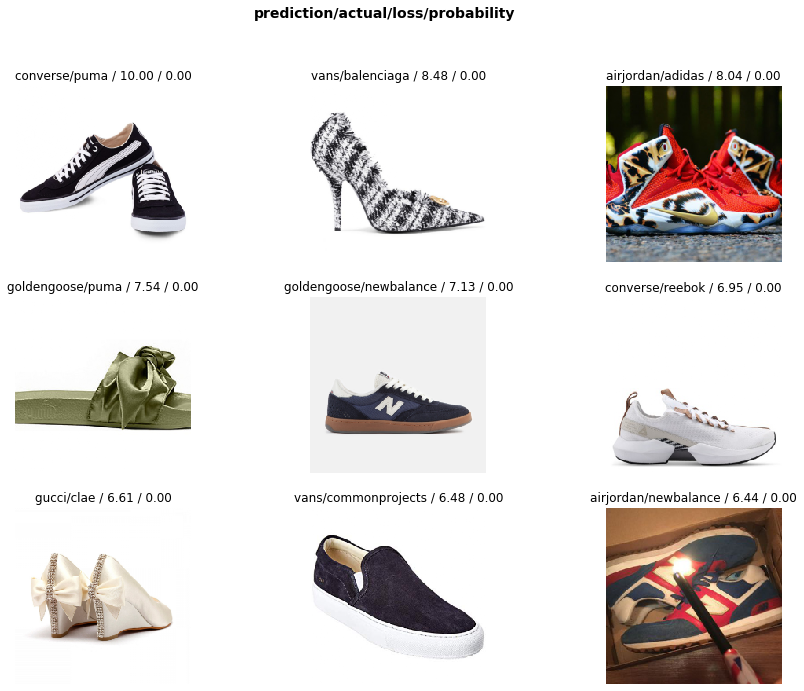

In [19]:
interp.plot_top_losses(9, figsize=(15,11))

In [7]:
learn.load('stage-2');

In [10]:
db = (ImageList.from_folder(Path('lesson1/shoe_brand_images'))
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [11]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [12]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [14]:
ImageCleaner(ds, idxs, Path('lesson1/shoe_brand_images'))

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [15]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [17]:
ImageCleaner(ds, idxs, Path('lesson1/shoe_brand_images'), duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [21]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn.model
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate,time
0,2.773422,1.758050,0.532296,03:54
1,2.041221,1.538344,0.472374,03:52
2,1.638849,1.405940,0.450584,03:51
3,1.399034,1.280613,0.401556,03:51
4,1.217156,1.247609,0.403113,03:57
5,1.086295,1.228745,0.402335,03:54


In [22]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate,time
0,1.094699,1.228790,0.395331,03:49
1,1.199716,1.295404,0.414008,03:54
2,1.185923,1.236256,0.394553,03:54
3,1.073148,1.177138,0.380545,03:54
4,0.949440,1.147342,0.371984,03:53
5,0.887113,1.144246,0.370428,03:50
